In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import sklearn
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from sklearn import metrics 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.optimizers import SGD
music_data = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Data/features_30_sec.csv')


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


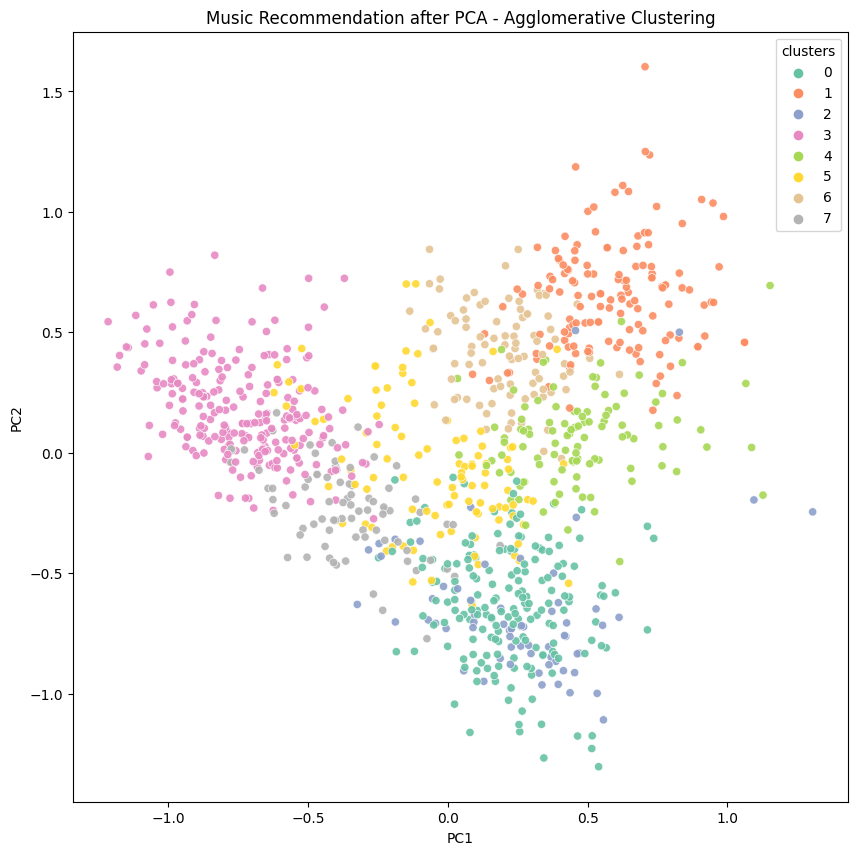

[[  0 496]
 [  1 259]
 [  2 523]
 ...
 [997 996]
 [998 525]
 [999 989]]


In [18]:
from sklearn.cluster import AgglomerativeClustering
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors

df = music_data.drop(['label'], axis=1)
df = df.set_index(df['filename'])
df = df.drop(['filename'], axis = 1)
df = df.drop(['length','rms_var',
              'zero_crossing_rate_var','harmony_mean',
              'perceptr_mean'], axis=1)

# define min max scaler
scaler = MinMaxScaler()
# transform data
scaled_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)
# print(scaled_df)

cluster = AgglomerativeClustering(n_clusters = 8, affinity = 'euclidean', linkage = 'ward')
cluster_fit = cluster.fit(scaled_df)

pd.options.display.max_columns = 13

predictions = cluster_fit.labels_
type(predictions)
scaled_df['clusters'] = predictions

pca = PCA(n_components=2)
pca_data = pd.DataFrame(pca.fit_transform(scaled_df.drop(['clusters'],axis=1)),columns=['PC1','PC2'], index=scaled_df.index)
pca_data['clusters']=predictions

plt.figure(figsize=(10,10))
sns.scatterplot(data=pca_data,x='PC1',y='PC2',hue='clusters',palette='Set2' , alpha = 0.9)
plt.title('Music Recommendation after PCA - Agglomerative Clustering')
# dist = sqrt((x1-x2)^2 + (y1 - y2)^2)
plt.show()

nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(pca_data)
distances, indices = nbrs.kneighbors(pca_data)
print(indices)

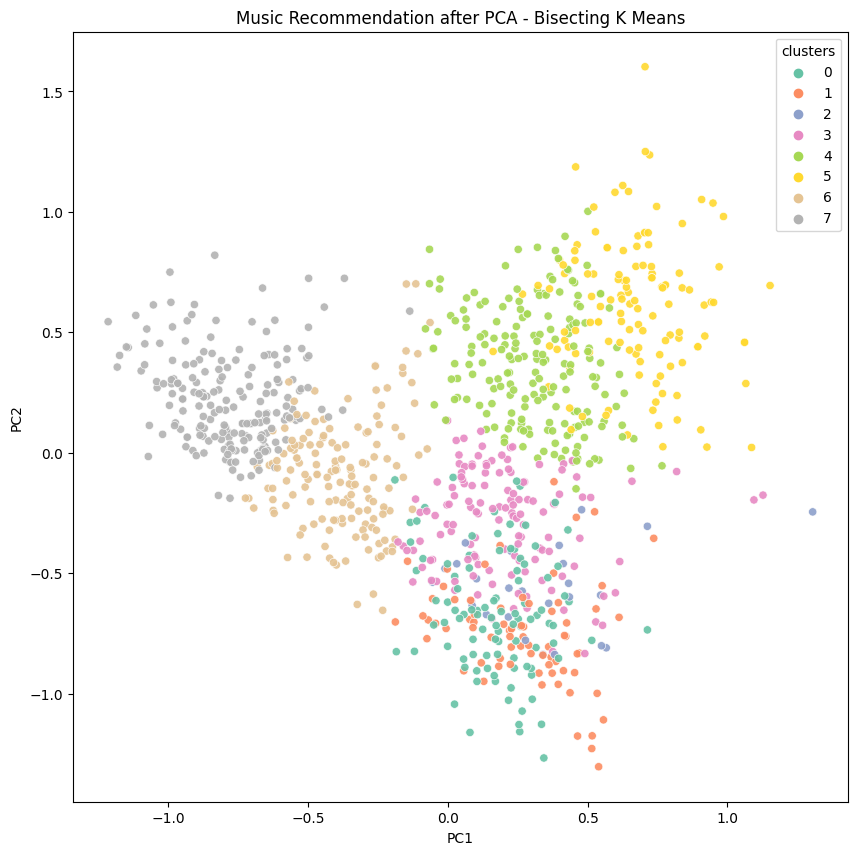

In [16]:
from sklearn.cluster import BisectingKMeans
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


df = music_data.drop(['label'], axis=1)
df = df.set_index(df['filename'])
df = df.drop(['filename'], axis = 1)
df = df.drop(['length','rms_var',
              'zero_crossing_rate_var','harmony_mean',
              'perceptr_mean'], axis=1)

# define min max scaler
scaler = MinMaxScaler()
# transform data
scaled_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)
# print(scaled_df)

cluster = BisectingKMeans(n_clusters = 8)
cluster_fit = cluster.fit(scaled_df)

pd.options.display.max_columns = 13

predictions = cluster_fit.labels_
type(predictions)
scaled_df['clusters'] = predictions

pca = PCA(n_components=2)
pca_data = pd.DataFrame(pca.fit_transform(scaled_df.drop(['clusters'],axis=1)),columns=['PC1','PC2'], index=scaled_df.index)
pca_data['clusters']=predictions

plt.figure(figsize=(10,10))
sns.scatterplot(data=pca_data,x='PC1',y='PC2',hue='clusters',palette='Set2' , alpha = 0.9)
plt.title('Music Recommendation after PCA - Bisecting K Means')
# dist = sqrt((x1-x2)^2 + (y1 - y2)^2)
plt.show()

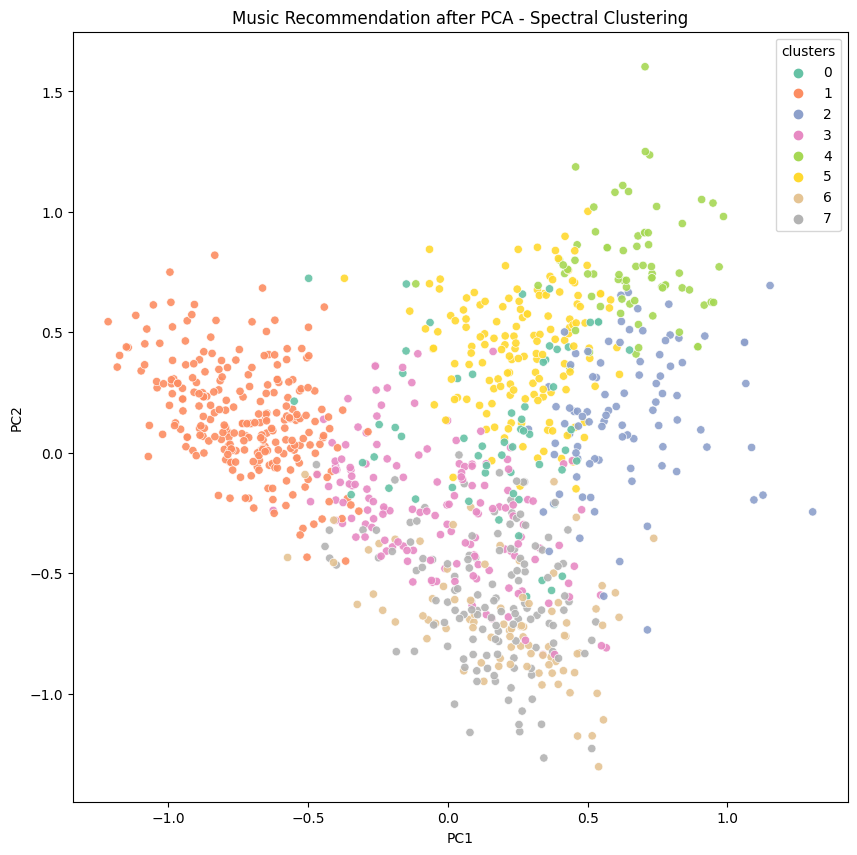

In [15]:
from sklearn.cluster import SpectralClustering
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


df = music_data.drop(['label'], axis=1)
df = df.set_index(df['filename'])
df = df.drop(['filename'], axis = 1)
df = df.drop(['length','rms_var',
              'zero_crossing_rate_var','harmony_mean',
              'perceptr_mean'], axis=1)

# define min max scaler
scaler = MinMaxScaler()
# transform data
scaled_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)
# print(scaled_df)

cluster = SpectralClustering(n_clusters=8, assign_labels='discretize')
cluster_fit = cluster.fit(scaled_df)

pd.options.display.max_columns = 13

predictions = cluster_fit.labels_
type(predictions)
scaled_df['clusters'] = predictions

pca = PCA(n_components=2)
pca_data = pd.DataFrame(pca.fit_transform(scaled_df.drop(['clusters'],axis=1)),columns=['PC1','PC2'], index=scaled_df.index)
pca_data['clusters']=predictions

plt.figure(figsize=(10,10))
sns.scatterplot(data=pca_data,x='PC1',y='PC2',hue='clusters',palette='Set2' , alpha = 0.9)
plt.title('Music Recommendation after PCA - Spectral Clustering')
# dist = sqrt((x1-x2)^2 + (y1 - y2)^2)
plt.show()